<a href="https://colab.research.google.com/github/SachinScaler/ProbAndStats_Sep24/blob/main/Probability_Distributions_5%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, expon, geom




In [4]:
# Q1) What is the probability of having no message in 10 seconds?
# poisson dist
lamda = 1/15
rate = 10 * lamda

poisson.pmf(k=0, mu = rate)

0.513417119032592

In [ ]:
# Q2) P(T > 10): 0 messages in first 10 secs or 1st message after 10 secs
# exponentation dist
1 - expon.cdf(x=10, scale=1/lamda)

In [5]:
# q3) P(T<=10): first message within 10 seconds
lamda = 1/15
expon.cdf(x=10, scale=1/lamda)

0.486582880967408

In [7]:
# q1
scale = 5
p_t_4_5 = expon.cdf(x=5, scale=scale) - expon.cdf(x=4, scale=scale)
p_t_4_5

0.08144952294577923

In [10]:
pt_9 = 1 - expon.cdf(x=9, scale=scale)
pt_3 = 1 - expon.cdf(x=3, scale=scale)

pt_more_9_given3 = pt_9/pt_3
pt_more_9_given3

0.30119421191220214

In [11]:
### p_more_t_6
pt_6 = 1 - expon.cdf(x=6, scale=scale)
pt_6

0.3011942119122022

In [12]:
expon.cdf(x=20, scale=50)

0.3296799539643607

resume-> 8:20

In [13]:
help(expon.cdf) # rehman

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.expon_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



### BOX-COX Transformation


In [18]:
from scipy.stats import boxcox
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#generate dataset: Not log-normal
data = np.random.exponential(size=1000)

data

array([7.95874508e-01, 1.25593076e+00, 9.23223146e-01, 7.87201152e-01,
       5.51048491e-01, 1.03815929e+00, 5.75519199e-01, 2.22352441e+00,
       3.31491218e+00, 4.83602101e-01, 1.56889614e+00, 7.52674110e-01,
       8.39432847e-01, 2.59825415e+00, 7.36853549e-02, 9.11610291e-02,
       2.04255867e-02, 1.78748768e+00, 1.50578423e+00, 2.04031428e+00,
       3.84522184e+00, 1.60523956e+00, 6.18929459e-01, 1.51653598e+00,
       1.25874412e-01, 1.02143189e+00, 1.54729683e-01, 2.89442045e+00,
       7.37827278e-01, 5.35565718e-01, 3.07280353e-01, 1.48825484e+00,
       6.09082416e-01, 8.40334707e-01, 1.89685717e-02, 9.61380929e-01,
       9.46996678e-01, 9.59547973e-01, 2.87791508e+00, 1.14513896e+00,
       4.45518493e-01, 5.74532409e-01, 1.19610780e+00, 6.21152959e-02,
       1.09891248e+00, 1.11059743e+00, 2.36206705e-01, 1.38028688e-01,
       3.78961966e-01, 4.52102056e-01, 8.44427781e-01, 5.77324311e-01,
       4.45449738e+00, 1.07635113e-01, 2.34301516e-01, 1.75913553e-01,
      

<ipython-input-21-40c10e8c4001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

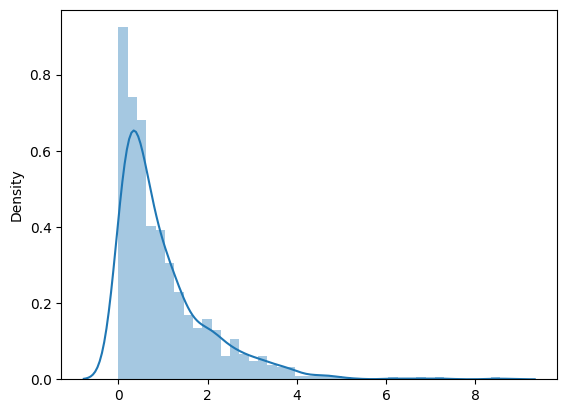

In [21]:
sns.distplot(data)

In [22]:
transformed, best_lambda = boxcox(data)

best_lambda

0.2420131978185579

<ipython-input-23-674699d08437>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed)


<Axes: ylabel='Density'>

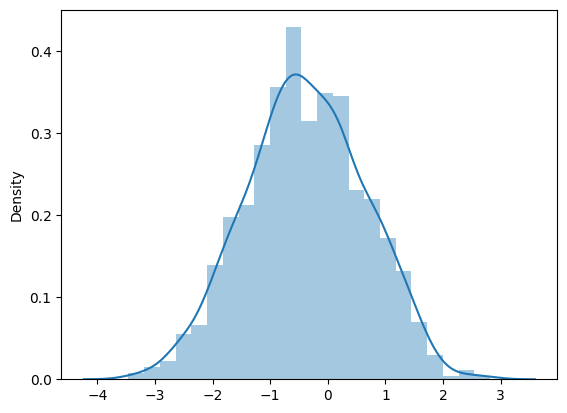

In [23]:
sns.distplot(transformed)

<ipython-input-24-f12a6280abcc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data))


<Axes: ylabel='Density'>

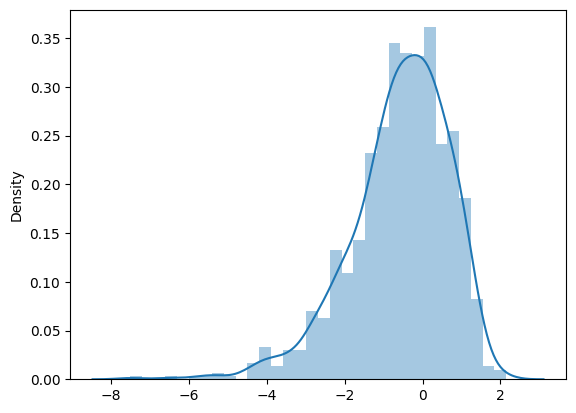

In [24]:
sns.distplot(np.log(data))

In [25]:
trans2, best_lambda2 = boxcox(np.log(data))
best_lambda2

ValueError: Data must be positive.

In [26]:
np.log(data) # get rid of negative values

array([-2.28313759e-01,  2.27876941e-01, -7.98843123e-02, -2.39271469e-01,
       -5.95932468e-01,  3.74492363e-02, -5.52482691e-01,  7.99093510e-01,
        1.19843113e+00, -7.26492816e-01,  4.50372277e-01, -2.84122934e-01,
       -1.75028798e-01,  9.54839740e-01, -2.60795121e+00, -2.39512779e+00,
       -3.89096691e+00,  5.80811103e-01,  4.09313847e-01,  7.13103855e-01,
        1.34683130e+00,  4.73273003e-01, -4.79763973e-01,  4.16428771e-01,
       -2.07247060e+00,  2.12054531e-02, -1.86607567e+00,  1.06278490e+00,
       -3.04045522e-01, -6.24431673e-01, -1.17999475e+00,  3.97604184e-01,
       -4.95801690e-01, -1.73955006e-01, -3.96497179e+00, -3.93845602e-02,
       -5.44596939e-02, -4.12929672e-02,  1.05706610e+00,  1.35525991e-01,
       -8.08516523e-01, -5.54198771e-01,  1.79072786e-01, -2.77876301e+00,
        9.43210363e-02,  1.04898099e-01, -1.44304799e+00, -1.98029373e+00,
       -9.70319432e-01, -7.93847336e-01, -1.69096064e-01, -5.49351106e-01,
        1.49391423e+00, -

### Geometric dist

In [27]:
###

p = 0.1

# num_interviews
x_vals = np.arange(1,20)
x_vals

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [31]:
prob = geom.pmf(3, p)
prob

0.08100000000000002

In [32]:
all_probs = geom.pmf(x_vals, p)
all_probs

array([0.1       , 0.09      , 0.081     , 0.0729    , 0.06561   ,
       0.059049  , 0.0531441 , 0.04782969, 0.04304672, 0.03874205,
       0.03486784, 0.03138106, 0.02824295, 0.02541866, 0.02287679,
       0.02058911, 0.0185302 , 0.01667718, 0.01500946])

<Axes: >

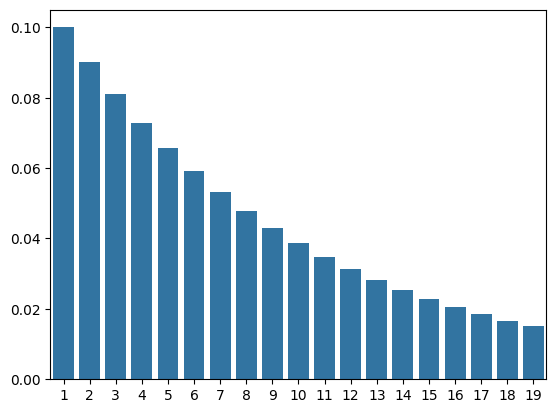

In [38]:
sns.barplot(y = all_probs, x = x_vals)

In [40]:
# quiz 1
geom.pmf(k=2, p=0.3)

0.21

In [43]:
# quiz 2
geom.cdf(k=2, p=0.05)

0.0975

### Bootstrap

In [44]:
salary = [35, 36, 33, 37, 34]
np.mean(salary)

35.0

### Bootstrap sampling

In [48]:
bs_samples = np.random.choice(salary, size=5)
bs_samples

array([37, 37, 37, 35, 35])

In [49]:
np.mean(bs_samples)

36.2

In [50]:
bs_means = []
for reps in range(1000):
    bs_samples = np.random.choice(salary, size=5)
    bs_means.append(np.mean(bs_samples))


len(bs_means)

1000

In [51]:
# step2: direcly calculate percentile
np.percentile(bs_means, [2.5, 97.5])

array([33.8, 36.2])